# Análisis Exploratorio de Datos (EDA) y Preprocesamiento:


## Paso 1: Cargar y Visualizar los Datos


In [40]:
import pandas as pd

# Cargar los datos de entrenamiento y prueba
df_train = pd.read_csv('credit-train.csv')
df_test = pd.read_csv('credit-test.csv')

# Describir los datos de entrenamiento
print("Descripción del conjunto de datos de entrenamiento:")
print(df_train.describe())

# Describir los datos de prueba
print("\nDescripción del conjunto de datos de prueba:")
print(df_test.describe())


Descripción del conjunto de datos de entrenamiento:
               age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp_var_rate  cons_price_idx  cons_conf_idx     euribor3m  \
count  41188.000000    41188.000000   41188.000000  41188.000000   
mean       0.081886       93.575664     -40.502600      3.621291   
std        1.570960        0.578840      

### Conjunto de Datos de Entrenamiento:

#### Edad (age):
- La edad promedio de los clientes en el conjunto de entrenamiento es de aproximadamente 40 años, con una desviación estándar de alrededor de 10 años.
- La edad mínima es 17 años y la máxima es 98 años.

#### Duración de la Llamada (duration):
- La duración promedio de las llamadas es de aproximadamente 258 segundos, con una desviación estándar alta de alrededor de 259 segundos.
- La duración mínima es 0 segundos y la máxima es 4918 segundos.

#### Número de Contactos en esta Campaña (campaign):
- El número promedio de contactos realizados durante esta campaña es de aproximadamente 2.6, con un máximo de 56 contactos.

#### Días Desde el Último Contacto (pdays):
- La mayoría de los clientes tienen un valor de 999 días, lo que indica que no fueron contactados previamente.

#### Resultado de Campañas Anteriores (previous):
- La mayoría de los clientes no fueron contactados previamente para esta campaña.

#### Variables Económicas:
- Las variables como emp_var_rate, cons_price_idx, cons_conf_idx, euribor3m y nr_employed tienen valores medios y rangos típicos para variables económicas.


## Paso 2: Visualizar la Distribución de Variables Numéricas


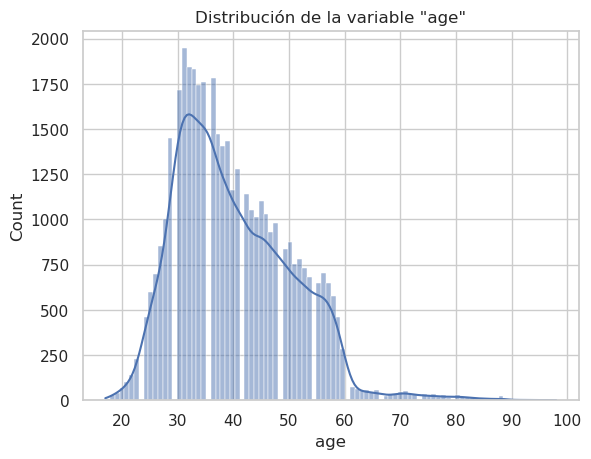

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualizar la distribución de variables numéricas
sns.histplot(data=df_train, x='age', kde=True)
plt.title('Distribución de la variable "age"')
plt.show()

## Paso 3: Visualizar Relaciones entre Variables


<Figure size 1000x800 with 0 Axes>

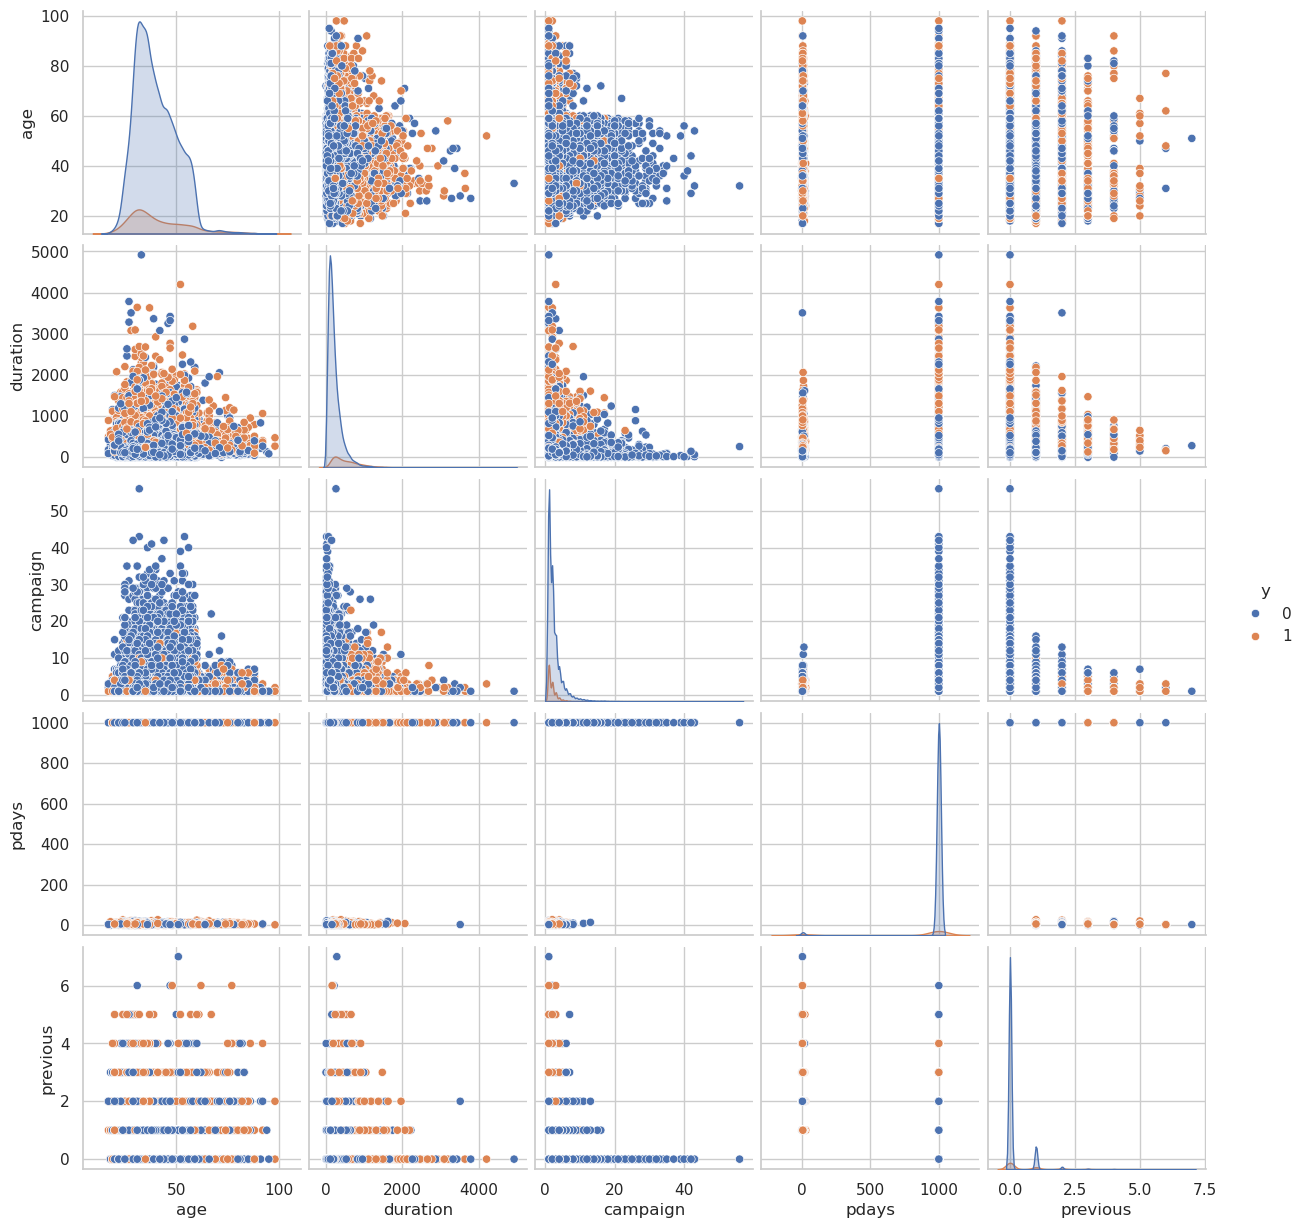

In [42]:
# Visualizar relaciones entre variables con un tamaño de figura personalizado
plt.figure(figsize=(10, 8))
sns.pairplot(df_train[['age', 'duration', 'campaign', 'pdays', 'previous', 'y']], hue='y', diag_kind='kde')
plt.show()

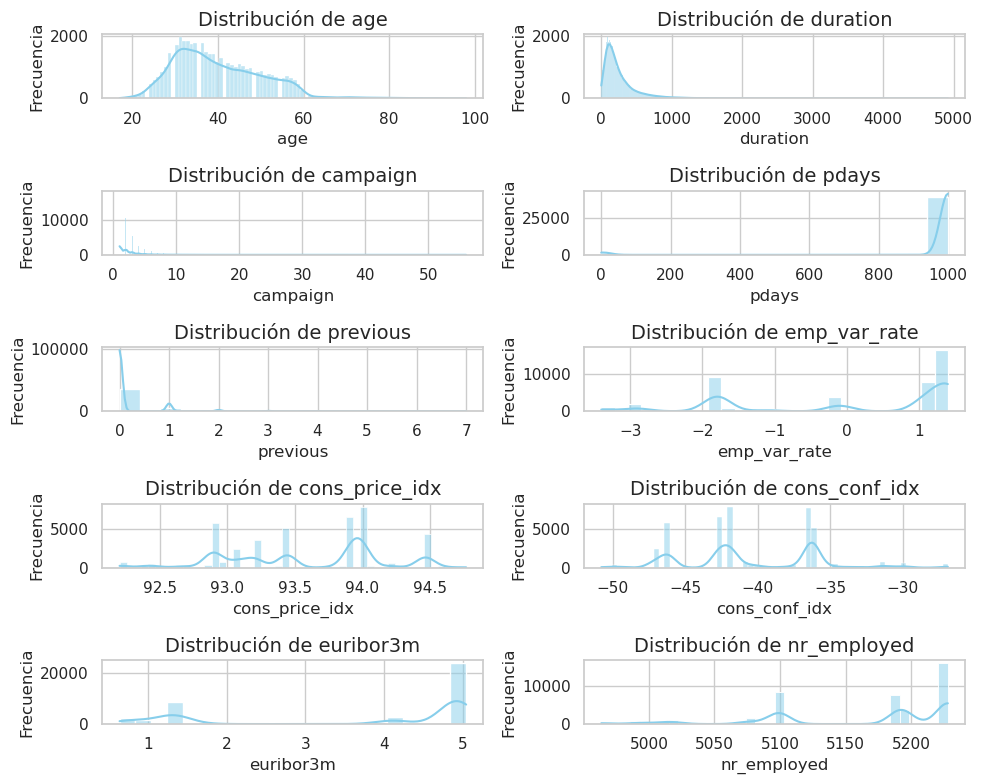

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Establecer el estilo de las gráficas
sns.set(style="whitegrid")

# Definir las variables numéricas a visualizar
numeric_variables = ['age', 'duration', 'campaign', 'pdays', 'previous', 
                     'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 
                     'euribor3m', 'nr_employed']

# Crear subgráficos para cada variable numérica
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(10, 8))

# Iterar sobre las variables y generar histogramas
for i, variable in enumerate(numeric_variables):
    row = i // 2
    col = i % 2
    sns.histplot(df_train[variable], ax=axes[row, col], kde=True, color='skyblue')
    axes[row, col].set_title(f'Distribución de {variable}', fontsize=14)
    axes[row, col].set_xlabel(variable, fontsize=12)
    axes[row, col].set_ylabel('Frecuencia', fontsize=12)

# Ajustar el espaciado entre las subgráficas
plt.tight_layout()
plt.show()


## Paso 4: Tratamiento de Valores Atípicos y Datos Faltantes


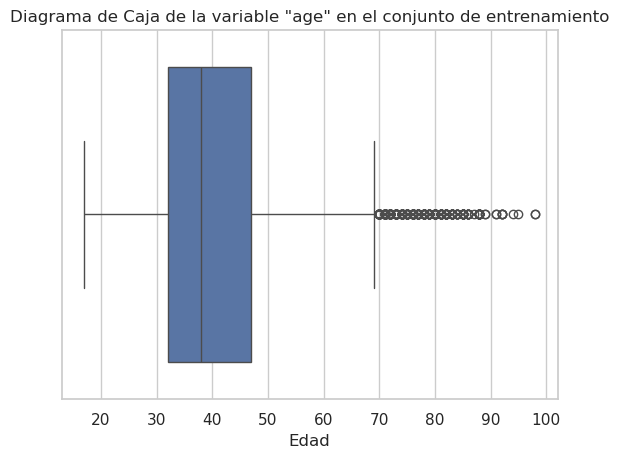

In [44]:
# Identificar valores atípicos en la variable 'age' basados en el diagrama de caja
sns.boxplot(x=df_train['age'])
plt.title('Diagrama de Caja de la variable "age" en el conjunto de entrenamiento')
plt.xlabel('Edad')
plt.show()



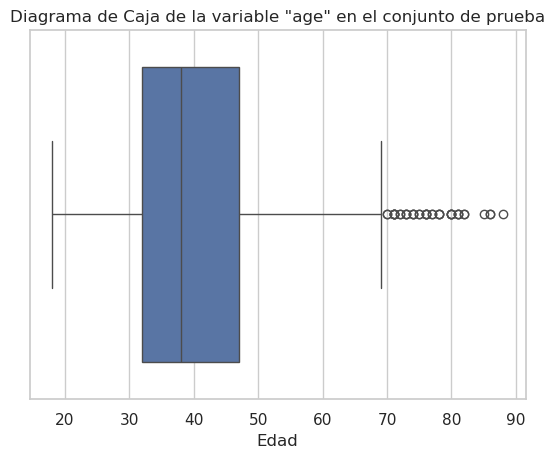

In [45]:
# Identificar valores atípicos en la variable 'age' basados en el diagrama de caja
sns.boxplot(x=df_test['age'])
plt.title('Diagrama de Caja de la variable "age" en el conjunto de prueba')
plt.xlabel('Edad')
plt.show()


In [46]:
# Tratar los valores atípicos en la variable 'age'
q1 = df_train['age'].quantile(0.25)
q3 = df_train['age'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

df_train['age'] = df_train['age'].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))


In [47]:
# Tratar los valores atípicos en la variable 'age'
q1 = df_test['age'].quantile(0.25)
q3 = df_test['age'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

df_test['age'] = df_test['age'].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))


verificar si se eliminaron los valores atipicos 

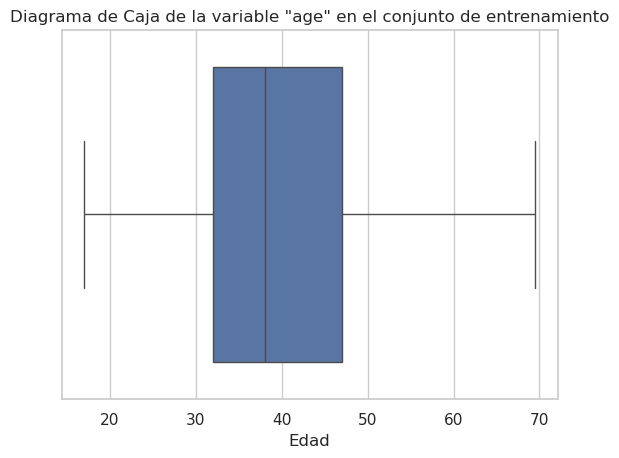

In [48]:
# Identificar valores atípicos en la variable 'age' basados en el diagrama de caja
sns.boxplot(x=df_train['age'])
plt.title('Diagrama de Caja de la variable "age" en el conjunto de entrenamiento')
plt.xlabel('Edad')
plt.show()


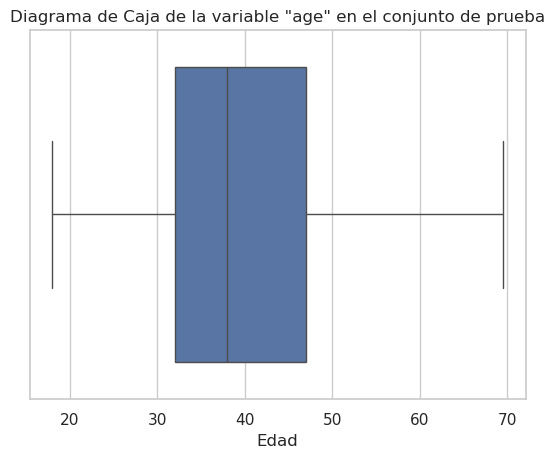

In [49]:
# Identificar valores atípicos en la variable 'age' basados en el diagrama de caja
sns.boxplot(x=df_test['age'])
plt.title('Diagrama de Caja de la variable "age" en el conjunto de prueba')
plt.xlabel('Edad')
plt.show()


In [50]:
print("df_train: ", df_train.describe())
print("df_test: ", df_test.describe())
# Ver las columnas de df_train
print("Columnas de df_train:")
print(df_train.columns)

# Ver el formato de los datos en df_train
print("\nInformación sobre df_train:")
print(df_train.info())

# Ver las columnas de df_test
print("\nColumnas de df_test:")
print(df_test.columns)

# Ver el formato de los datos en df_test
print("\nInformación sobre df_test:")
print(df_test.info())


df_train:                  age      duration      campaign         pdays      previous  \
count  41188.000000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      39.939485    258.285010      2.567593    962.475454      0.172963   
std       10.129367    259.279249      2.770014    186.910907      0.494901   
min       17.000000      0.000000      1.000000      0.000000      0.000000   
25%       32.000000    102.000000      1.000000    999.000000      0.000000   
50%       38.000000    180.000000      2.000000    999.000000      0.000000   
75%       47.000000    319.000000      3.000000    999.000000      0.000000   
max       69.500000   4918.000000     56.000000    999.000000      7.000000   

       emp_var_rate  cons_price_idx  cons_conf_idx     euribor3m  \
count  41188.000000    41188.000000   41188.000000  41188.000000   
mean       0.081886       93.575664     -40.502600      3.621291   
std        1.570960        0.578840       4.628198      1.734447   
min  

# Aplicación de KNN

## Paso 5: Codificación de Variables Categóricas y División de Datos


In [53]:
from sklearn.preprocessing import LabelEncoder

# Crear una instancia de LabelEncoder
label_encoder = LabelEncoder()

# Codificar etiquetas para cada variable categórica en df_train
for column in df_train.select_dtypes(include=['object']).columns:
    df_train[column] = label_encoder.fit_transform(df_train[column])

# Verificar los cambios
print("DataFrame df_train después de la codificación de etiquetas:")
print(df_train.head())



DataFrame df_train después de la codificación de etiquetas:
    age  job  marital  education  default  housing  loan  contact  month  \
0  44.0    1        1          0        1        2     0        0      1   
1  53.0    9        1          7        0        0     0        0      7   
2  28.0    4        2          6        0        2     0        0      4   
3  39.0    7        1          3        0        0     0        0      0   
4  55.0    5        1          0        0        2     0        0      1   

   day_of_week  ...  campaign  pdays  previous  poutcome  emp_var_rate  \
0            2  ...         1    999         0         1           1.4   
1            0  ...         1    999         0         1          -0.1   
2            2  ...         3      6         2         2          -1.7   
3            0  ...         2    999         0         1          -1.8   
4            0  ...         1      3         1         2          -2.9   

   cons_price_idx  cons_conf_idx  euri

Después de aplicar la codificación de etiquetas, podemos ver que todas las variables categóricas en el DataFrame df_train se han convertido en variables numéricas. Cada valor único en las columnas categóricas se ha asignado a un número entero único. Aquí hay algunas observaciones:

- Las columnas categóricas, como "job", "marital", "education", entre otras, ahora contienen valores numéricos en lugar de cadenas de texto.
- Cada valor único en las columnas categóricas se ha asignado a un número entero único. Por ejemplo, en la columna "job", "blue-collar" se ha asignado a 1, "technician" a 9, etc.
- Las variables numéricas, como "age" y "campaign", permanecen sin cambios, ya que no necesitan ser codificadas.


## Paso 6: Entrenamiento y Evaluación del Modelo KNN


In [54]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Definir X y y para df_train
X_train = df_train.drop('y', axis=1)
y_train = df_train['y']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Normalizar las características
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train_split)
X_val_normalized = scaler.transform(X_val_split)

# Entrenar el clasificador KNN con características normalizadas
knn_normalized = KNeighborsClassifier()
knn_normalized.fit(X_train_normalized, y_train_split)

# Predecir en el conjunto de validación
y_pred_normalized = knn_normalized.predict(X_val_normalized)

# Calcular la precisión del modelo con características normalizadas
accuracy_normalized = accuracy_score(y_val_split, y_pred_normalized)
print("Precisión del modelo con características normalizadas:", accuracy_normalized)

# Entrenar el clasificador KNN sin características normalizadas
knn_unnormalized = KNeighborsClassifier()
knn_unnormalized.fit(X_train_split, y_train_split)

# Predecir en el conjunto de validación sin normalización
y_pred_unnormalized = knn_unnormalized.predict(X_val_split)

# Calcular la precisión del modelo sin características normalizadas
accuracy_unnormalized = accuracy_score(y_val_split, y_pred_unnormalized)
print("Precisión del modelo sin características normalizadas:", accuracy_unnormalized)


Precisión del modelo con características normalizadas: 0.898761835396941
Precisión del modelo sin características normalizadas: 0.9021607186210245


Evaluación del Modelo KNN

In [19]:
# Predicción sobre el conjunto de validación
y_pred_validation = knn_classifier.predict(X_validation)

# Calcular métricas de evaluación
accuracy_validation = accuracy_score(y_validation, y_pred_validation)
precision_validation = precision_score(y_validation, y_pred_validation)
recall_validation = recall_score(y_validation, y_pred_validation)
f1_validation = f1_score(y_validation, y_pred_validation)
confusion_matrix_validation = confusion_matrix(y_validation, y_pred_validation)

# Mostrar resultados de evaluación
print("Resultados de la evaluación del modelo KNN en el conjunto de validación:")
print("Exactitud:", accuracy_validation)
print("Precisión:", precision_validation)
print("Exhaustividad:", recall_validation)
print("Puntuación F1:", f1_validation)
print("Matriz de confusión:")
print(confusion_matrix_validation)



NotFittedError: This KNeighborsClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.